In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, pearsonr
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('dsa210projedata.csv')

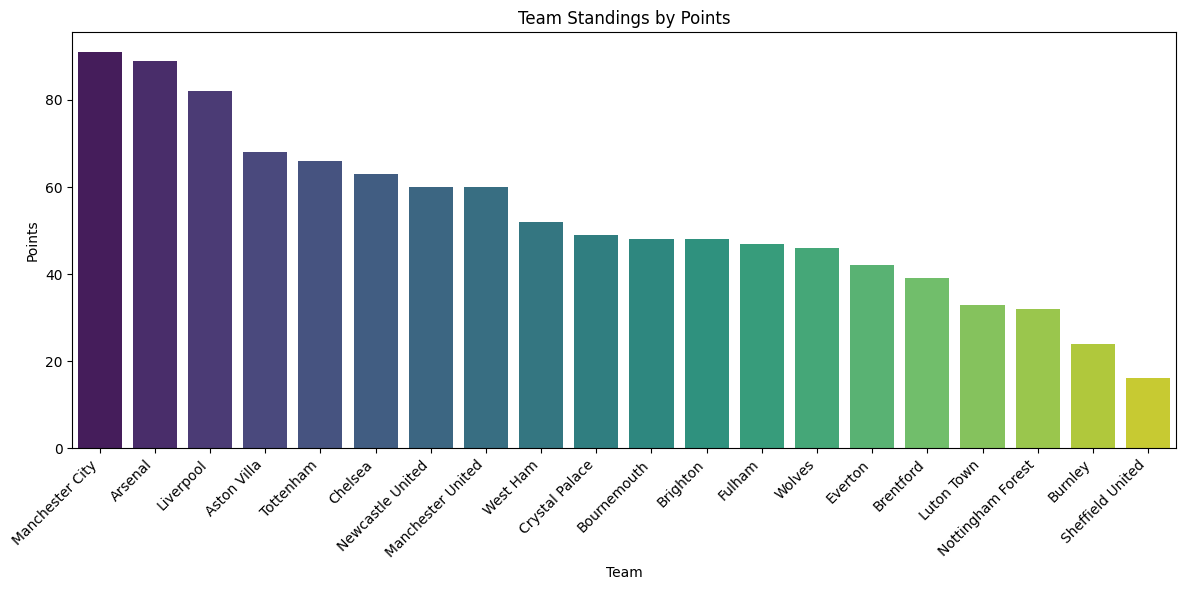

In [42]:
# Team Standings
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by='Points', ascending=False), x='Team', y='Points', palette='viridis')
plt.title('Team Standings by Points')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

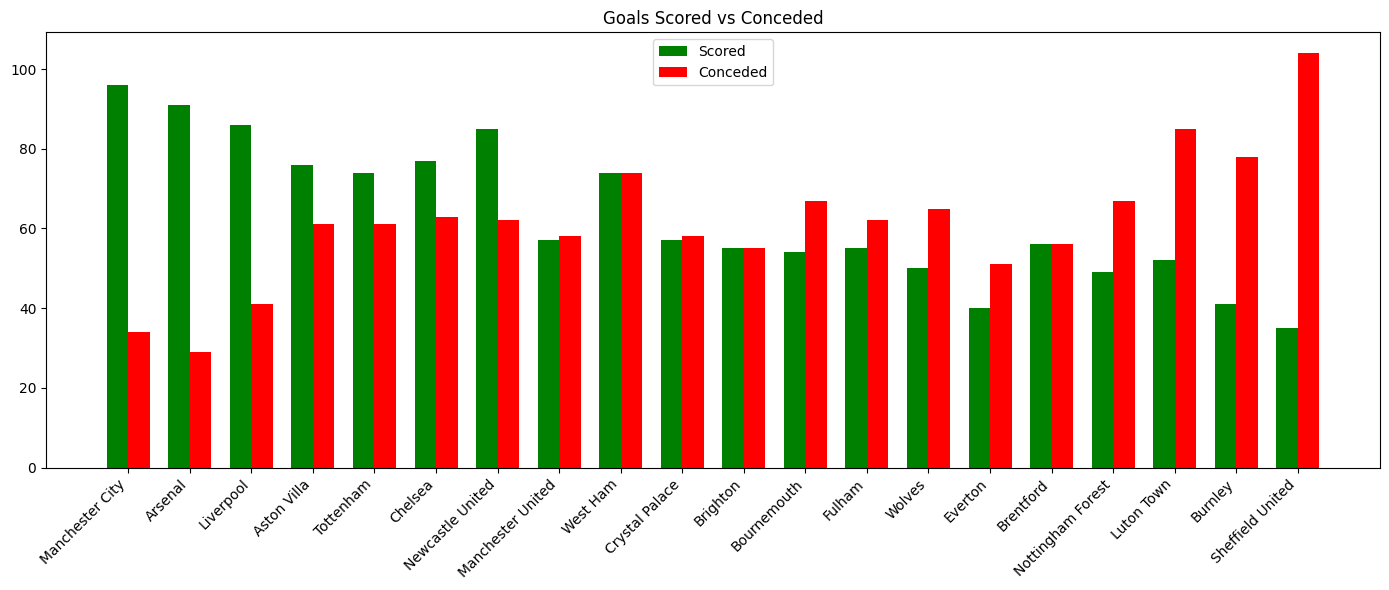

In [43]:
# Goal Performance
plt.figure(figsize=(14, 6))
x = np.arange(len(df['Team']))
width = 0.35
plt.bar(x - width/2, df['Goals Scored'], width, label='Scored', color='green')
plt.bar(x + width/2, df['Goals Conceded'], width, label='Conceded', color='red')
plt.xticks(x, df['Team'], rotation=45, ha='right')
plt.title('Goals Scored vs Conceded')
plt.legend()
plt.tight_layout()
plt.show()


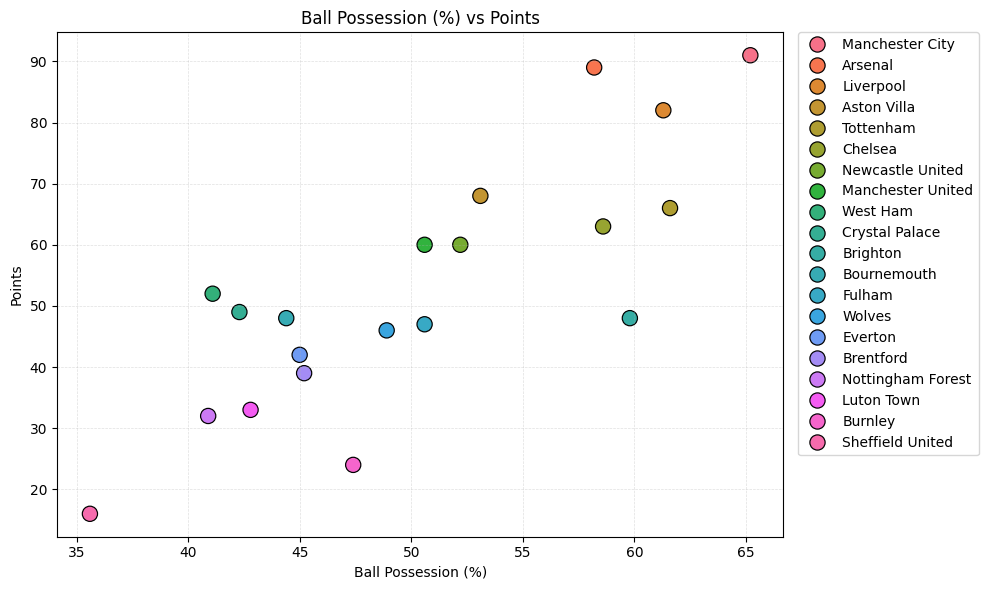

In [44]:
# Possession vs Points
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Ball Possession (%)', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Ball Possession (%) vs Points')
plt.xlabel('Ball Possession (%)')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

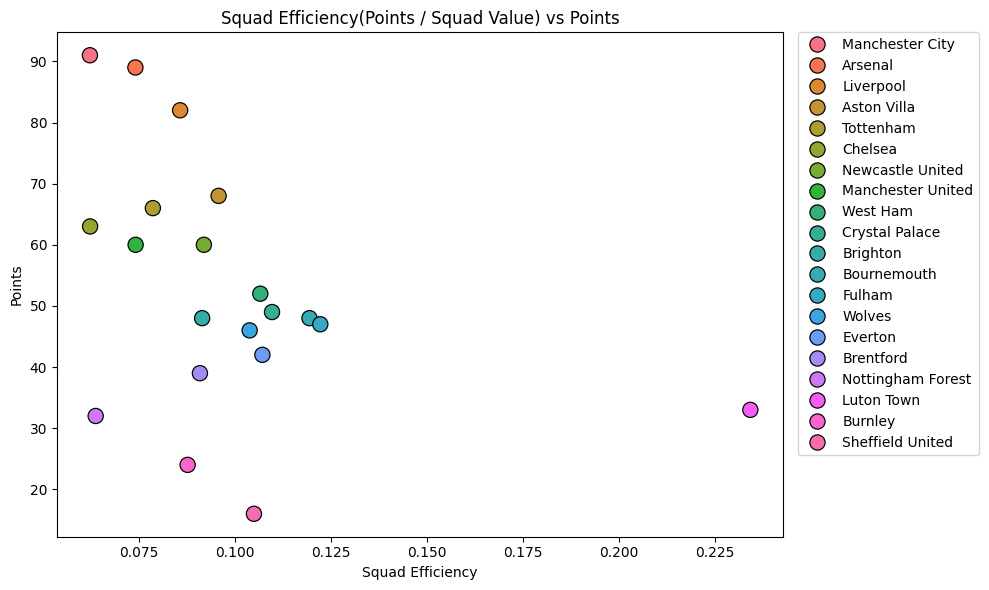

In [45]:
# Squad Efficiency vs Points
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Squad Efficiency', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Squad Efficiency(Points / Squad Value) vs Points')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


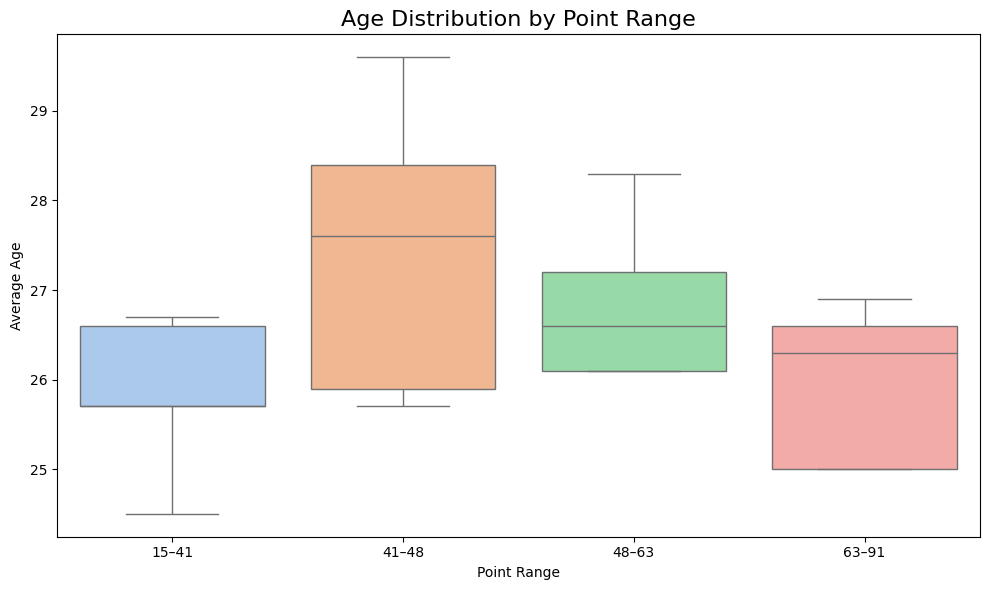

In [46]:
# 5. Age vs Performance
df['Point_Category'] = pd.qcut(df['Points'], q=4)
df['Point_Category_Label'] = df['Point_Category'].apply(lambda x: f"{int(x.left)}–{int(x.right)}")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Point_Category_Label', y='Average Age', showfliers=False, palette='pastel')
plt.title('Age Distribution by Point Range', fontsize=16)
plt.xlabel('Point Range')
plt.ylabel('Average Age')
plt.tight_layout()
plt.show()

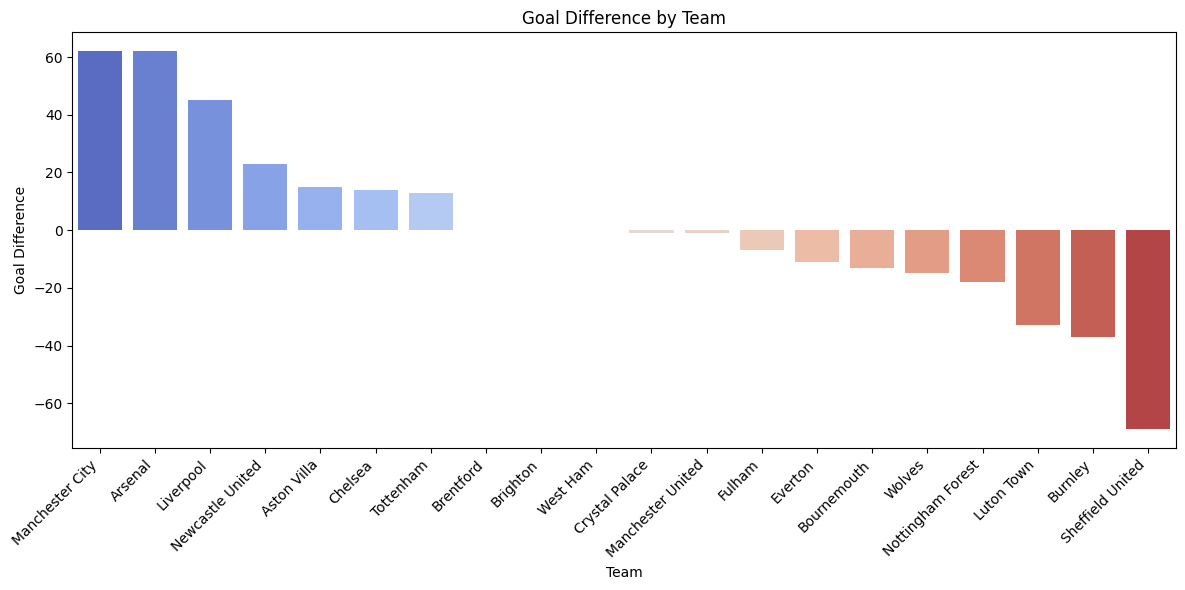

In [47]:
# Goal Difference
plt.figure(figsize=(12, 6))
sns.barplot(data=df.sort_values(by='Goal Difference', ascending=False), x='Team', y='Goal Difference', palette='coolwarm')
plt.title('Goal Difference by Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

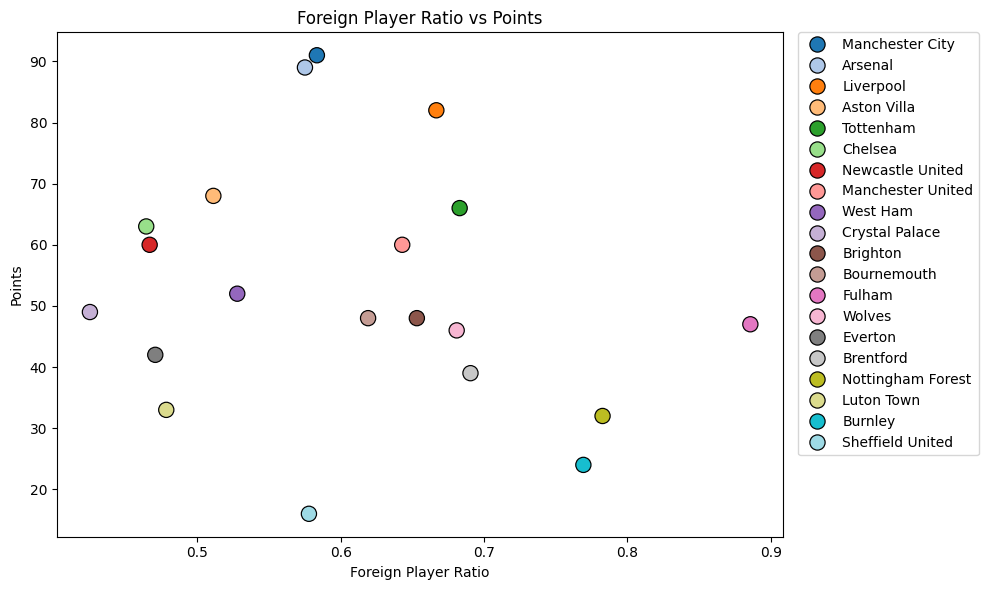

In [48]:
# Foreign Player Ratio vs Points (scatter)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Foreign Player Ratio', y='Points', hue='Team', s=120, edgecolor='black', palette='tab20')
plt.title('Foreign Player Ratio vs Points')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


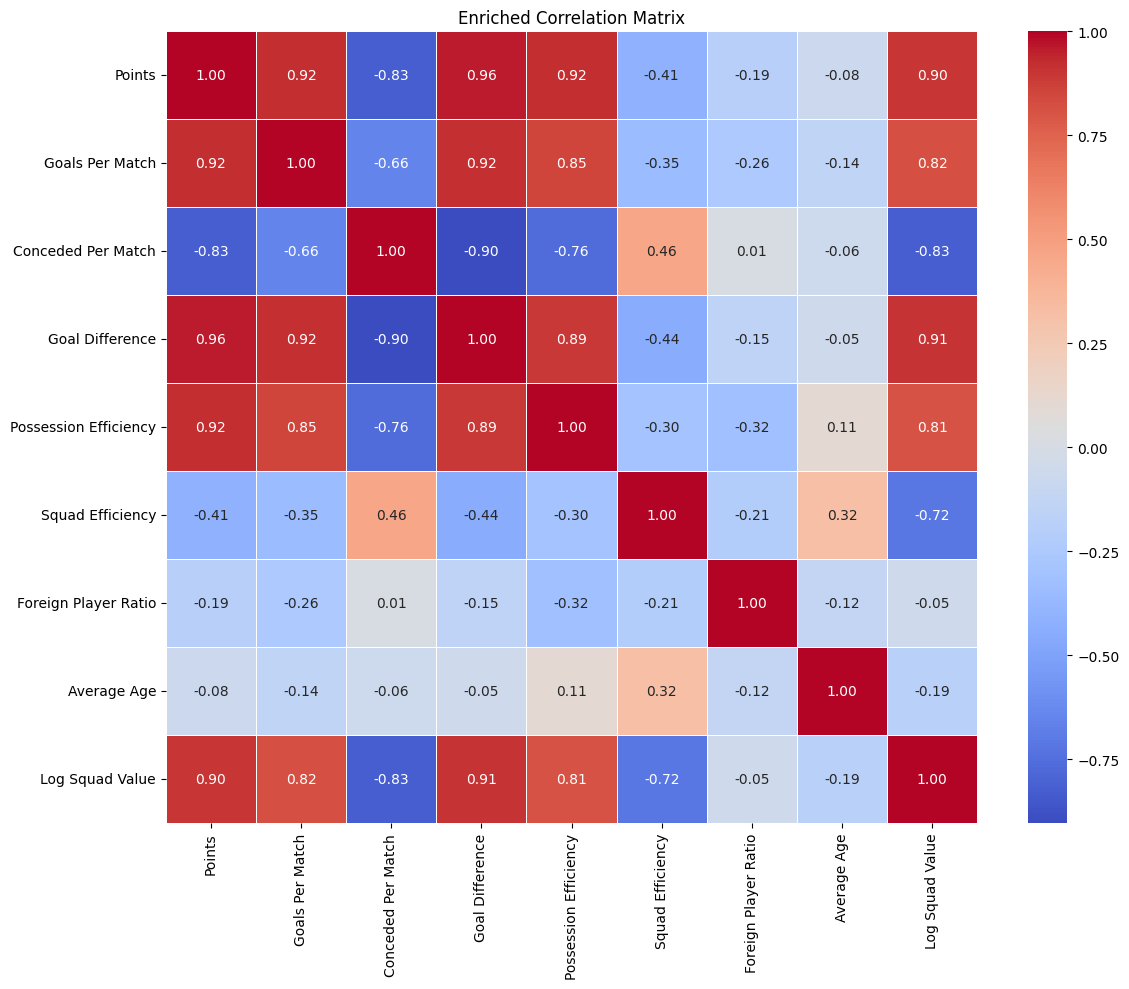

In [49]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr_cols = [
    'Points', 'Goals Per Match', 'Conceded Per Match', 'Goal Difference',
    'Possession Efficiency', 'Squad Efficiency', 'Foreign Player Ratio',
    'Average Age', 'Log Squad Value'
]
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Enriched Correlation Matrix')
plt.tight_layout()
plt.show()



📊 Hypothesis 6: Log Squad Value vs Points
Pearson Corr: 0.90 | P-value: 0.0000
→ ✅ Significant, p < 0.05 , Reject H0


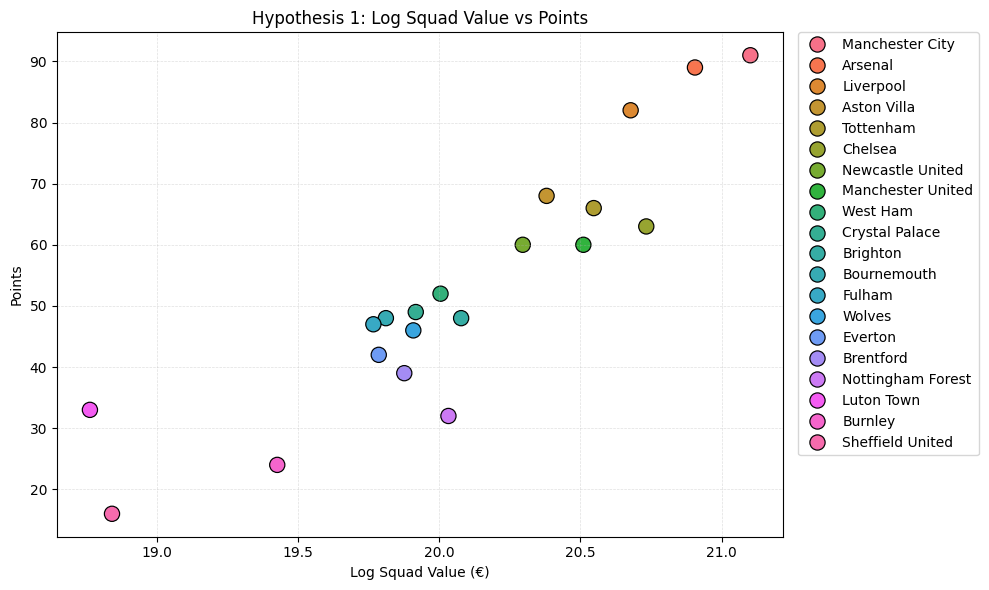

In [54]:
# Hypothesis 1: Log Squad Value vs Points
corr_logval, p_logval = pearsonr(df['Log Squad Value'], df['Points'])
print("\n📊 Hypothesis 6: Log Squad Value vs Points")
print(f"Pearson Corr: {corr_logval:.2f} | P-value: {p_logval:.4f}")
print("→", "✅ Significant, p < 0.05 , Reject H0" if p_logval < 0.05 else "❌ Not Significant, p > 0.05 , Fail to reject H0")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Log Squad Value', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Hypothesis 1: Log Squad Value vs Points')
plt.xlabel('Log Squad Value (€)')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


📊 Hypothesis 2: Foreign Players Ratio vs Points
Pearson Corr: -0.19 | P-value: 0.4178
→ ❌ Not Significant, p > 0.05, Fail to Reject H0


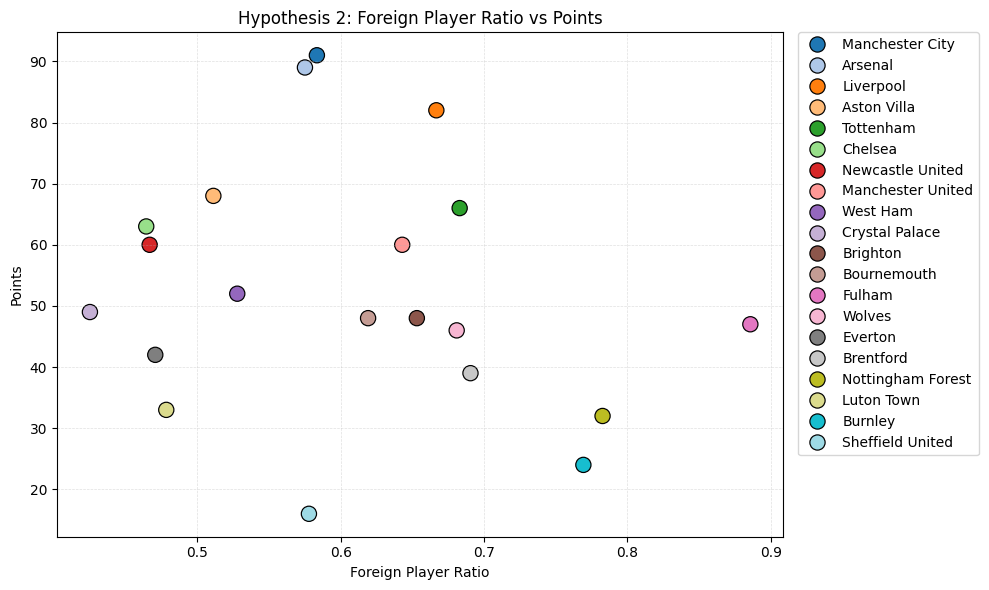

In [55]:
# Hypothesis 2: Foreign Players Ratio vs Points
corr_fpr, p_fpr = pearsonr(df['Foreign Player Ratio'], df['Points'])
print("\n📊 Hypothesis 2: Foreign Players Ratio vs Points")
print(f"Pearson Corr: {corr_fpr:.2f} | P-value: {p_fpr:.4f}")
print("→", "✅ Significant, p < 0.05, Reject H0" if p_fpr < 0.05 else "❌ Not Significant, p > 0.05, Fail to Reject H0")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Foreign Player Ratio', y='Points', hue='Team', s=120, edgecolor='black', palette='tab20')
plt.title('Hypothesis 2: Foreign Player Ratio vs Points')
plt.xlabel('Foreign Player Ratio')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()



📊 Hypothesis 5: Conceded Per Match vs Points
Pearson Corr: -0.83 | P-value: 0.0000
→ ✅ Significant, p < 0.05 , Reject H0


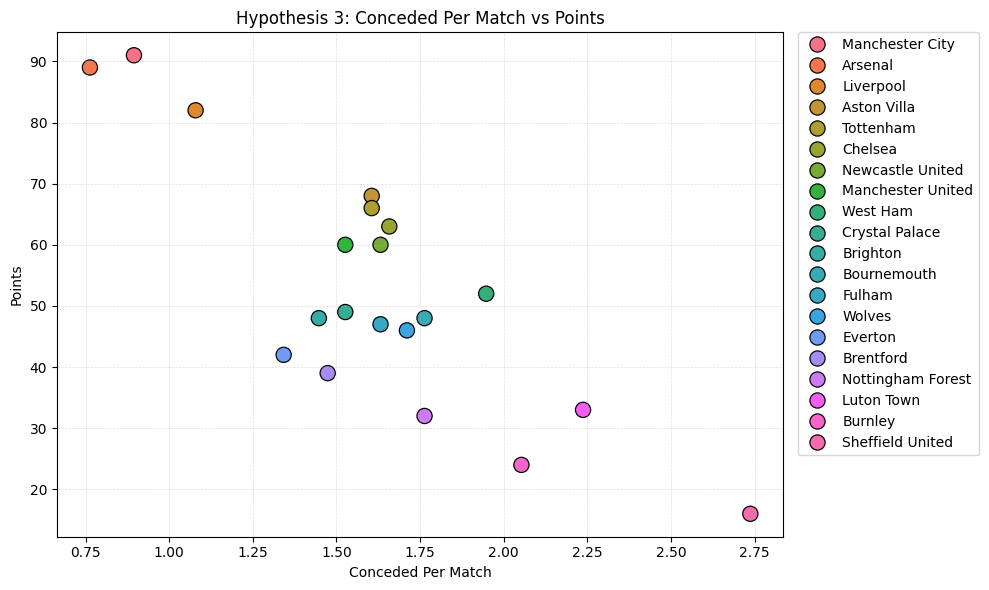

In [56]:
# Hypothesis 3: Conceded Per Match vs Points
corr_conc, p_conc = pearsonr(df['Conceded Per Match'], df['Points'])
print("\n📊 Hypothesis 5: Conceded Per Match vs Points")
print(f"Pearson Corr: {corr_conc:.2f} | P-value: {p_conc:.4f}")
print("→", "✅ Significant, p < 0.05 , Reject H0" if p_conc < 0.05 else "❌ Not Significant, p > 0.05 , Fail to reject H0")

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Conceded Per Match', y='Points', hue='Team', s=120, edgecolor='black')
plt.title('Hypothesis 3: Conceded Per Match vs Points')
plt.xlabel('Conceded Per Match')
plt.ylabel('Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


📊 Hypothesis 4: Possession Efficiency vs Points
Pearson Corr: 0.92 | P-value: 0.0000
→ ✅ Significant, p < 0.05, Reject H0


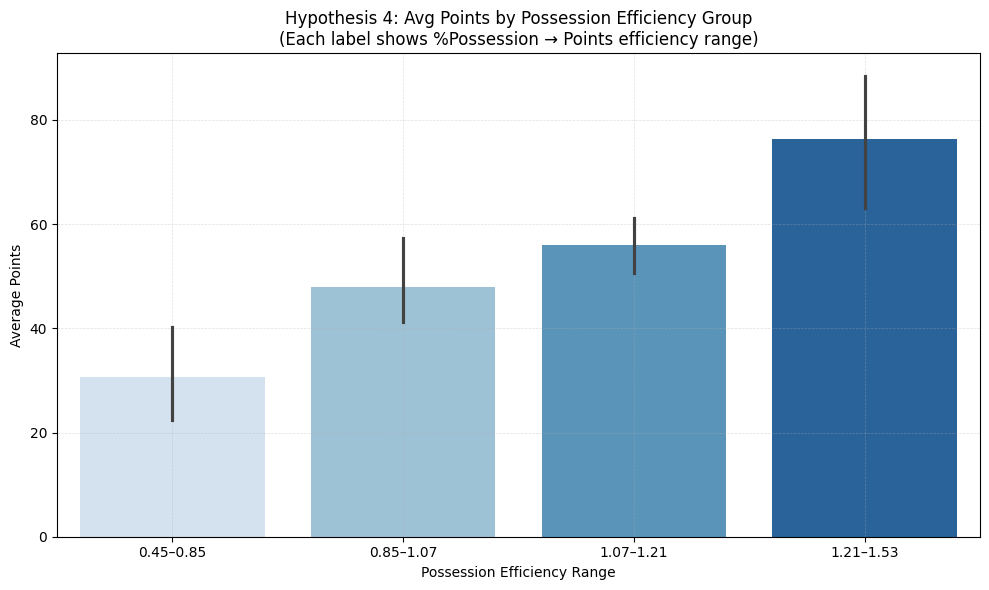

In [57]:
# Hypothesis 4: Possession Efficiency vs Points
corr_pe, p_pe = pearsonr(df['Possession Efficiency'], df['Points'])
print("\n📊 Hypothesis 4: Possession Efficiency vs Points")
print(f"Pearson Corr: {corr_pe:.2f} | P-value: {p_pe:.4f}")
print("→", "✅ Significant, p < 0.05, Reject H0" if p_pe < 0.05 else "❌ Not Significant, p > 0.05, Fail to Reject H0")
df['Possession Efficiency Group'] = pd.qcut(df['Possession Efficiency'], q=4)
df['Possession Efficiency Label'] = df['Possession Efficiency Group'].apply(
    lambda x: f"{x.left:.2f}–{x.right:.2f}"
)
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Possession Efficiency Label', y='Points', estimator='mean', palette='Blues')
plt.title('Hypothesis 4: Avg Points by Possession Efficiency Group\n(Each label shows %Possession → Points efficiency range)')
plt.xlabel('Possession Efficiency Range')
plt.ylabel('Average Points')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.4)
plt.tight_layout()
plt.show()